#**Week 07 - MCI-M231 - Programming, Data Science and Statistics 3**


Librairies

In [1]:
install.packages("lme4")
install.packages("tidyverse")
install.packages("psych")
install.packages("broom.mixed")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘coda’, ‘furrr’




In [2]:
library(Matrix)
library(lme4)
library(tidyverse)
library(broom)
library(MASS)
library(psych)
library(broom.mixed)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




**01 - Data exploration**


In [3]:
# learning about the dataset

In [4]:
?sleepstudy

In [5]:
# a) loading
data("sleepstudy")
sleepstudy_days <- sleepstudy %>%
  filter(Days > 1)

Note: We must exclude day 2 and day 1 off the list since they were for training and sleep deprivation started from the second which is the baseline.

In [6]:
# b) structure
str(sleepstudy_days)
head(sleepstudy_days)

'data.frame':	144 obs. of  3 variables:
 $ Reaction: num  251 321 357 415 382 ...
 $ Days    : num  2 3 4 5 6 7 8 9 2 3 ...
 $ Subject : Factor w/ 18 levels "308","309","310",..: 1 1 1 1 1 1 1 1 2 2 ...


,Reaction,Days,Subject
,<dbl>,<dbl>,<fct>
1,250.8006,2,308
2,321.4398,3,308
3,356.8519,4,308
4,414.6901,5,308
5,382.2038,6,308
6,290.1486,7,308


Note: This dataset records data points from the same subjects for multiple days, we must note this when thinking about modelling it.

`geom_smooth()` using formula = 'y ~ x'


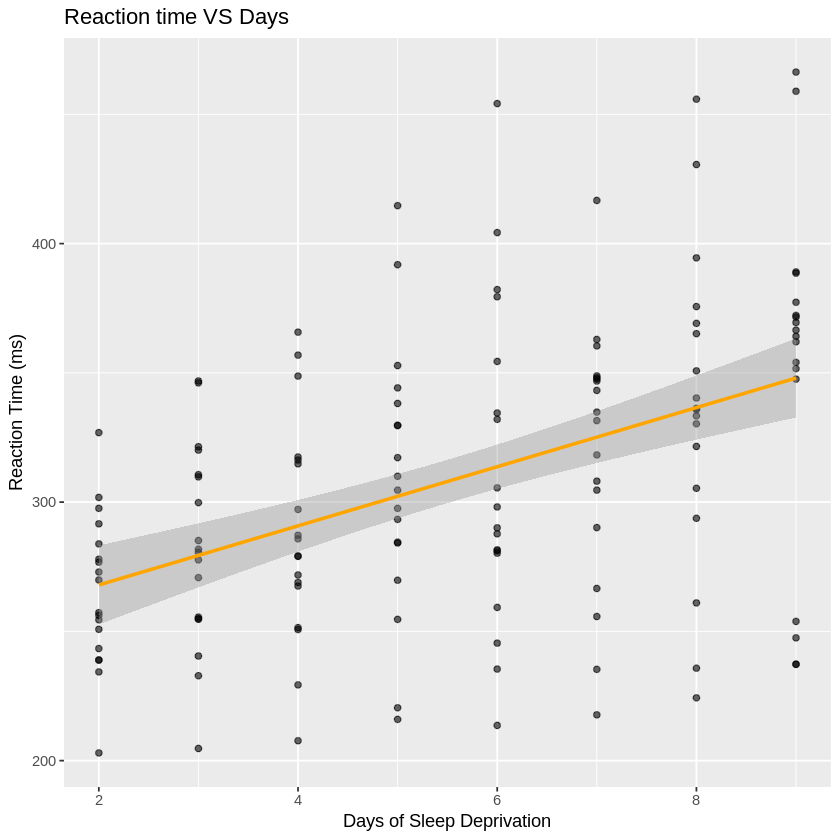

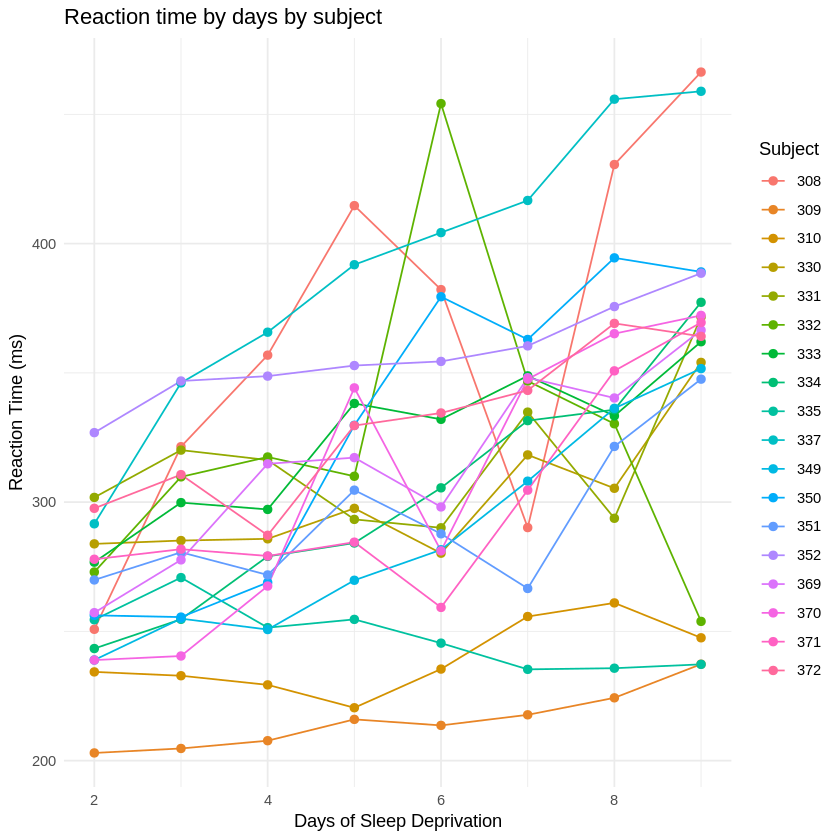

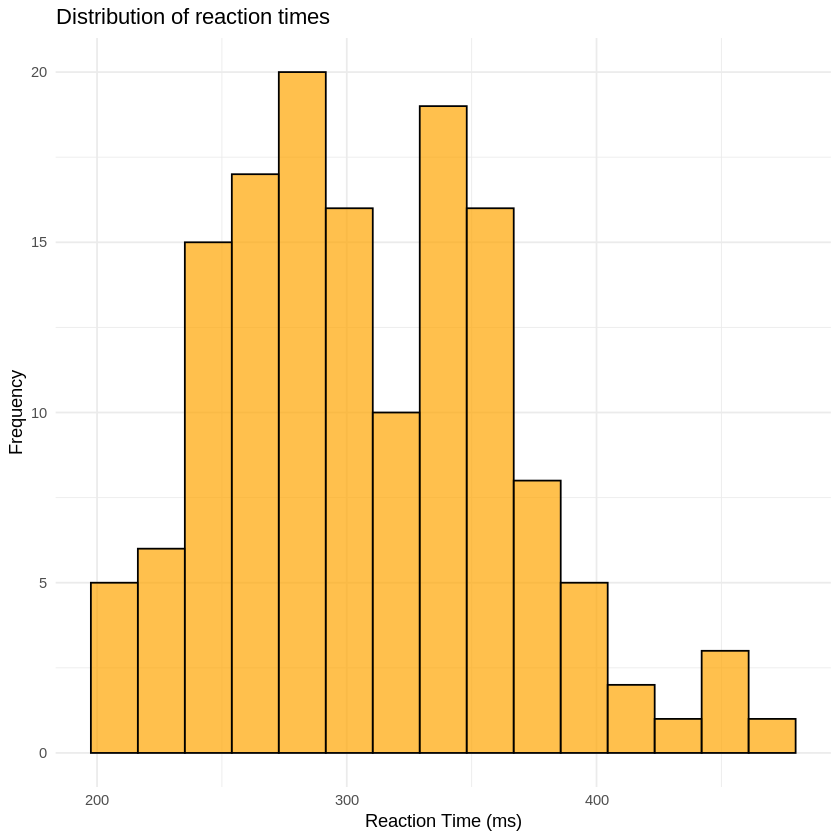

In [7]:
# c) distribution & relationships

# exploring relationship by subject
ggplot(sleepstudy_days, aes(x = Days, y = Reaction)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", color = "orange") +
  labs(title = "Reaction time VS Days",
       x = "Days of Sleep Deprivation",
       y = "Reaction Time (ms)")

# exploring relationship by subject
ggplot(sleepstudy_days, aes(x = Days, y = Reaction, group = Subject, color = as.factor(Subject))) +
  geom_line() +
  geom_point(size = 2) +
  labs(title = "Reaction time by days by subject",
       x = "Days of Sleep Deprivation",
       y = "Reaction Time (ms)",
       color = "Subject") +
  theme_minimal()

# distribution histogram
ggplot(sleepstudy_days, aes(x = Reaction)) +
  geom_histogram(bins = 15, fill = "orange", color = "black", alpha = 0.7) +
  labs(title = "Distribution of reaction times",
       x = "Reaction Time (ms)",
       y = "Frequency") +
  theme_minimal()

Note: The plots shows an overall increasing trend of reaction time across days of sleep deprivation.

**02 - Descriptive statistics**


In [8]:
# a) summary statistics
summary(sleepstudy)

describe(sleepstudy)

    Reaction          Days        Subject   
 Min.   :194.3   Min.   :0.0   308    : 10  
 1st Qu.:255.4   1st Qu.:2.0   309    : 10  
 Median :288.7   Median :4.5   310    : 10  
 Mean   :298.5   Mean   :4.5   330    : 10  
 3rd Qu.:336.8   3rd Qu.:7.0   331    : 10  
 Max.   :466.4   Max.   :9.0   332    : 10  
                               (Other):120  

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Reaction,1,180,298.5079,56.328757,288.6508,295.1736,59.33929,194.3322,466.3535,272.0213,0.5813762,0.02944788,4.1984977
Days,2,180,4.5000,2.880293,4.5000,4.5000,3.70650,0.0000,9.0000,9.0000,0.0000000,-1.24391826,0.2146844
Subject*,3,180,9.5000,5.202599,9.5000,9.5000,6.67170,1.0000,18.0000,17.0000,0.0000000,-1.22729245,0.3877789


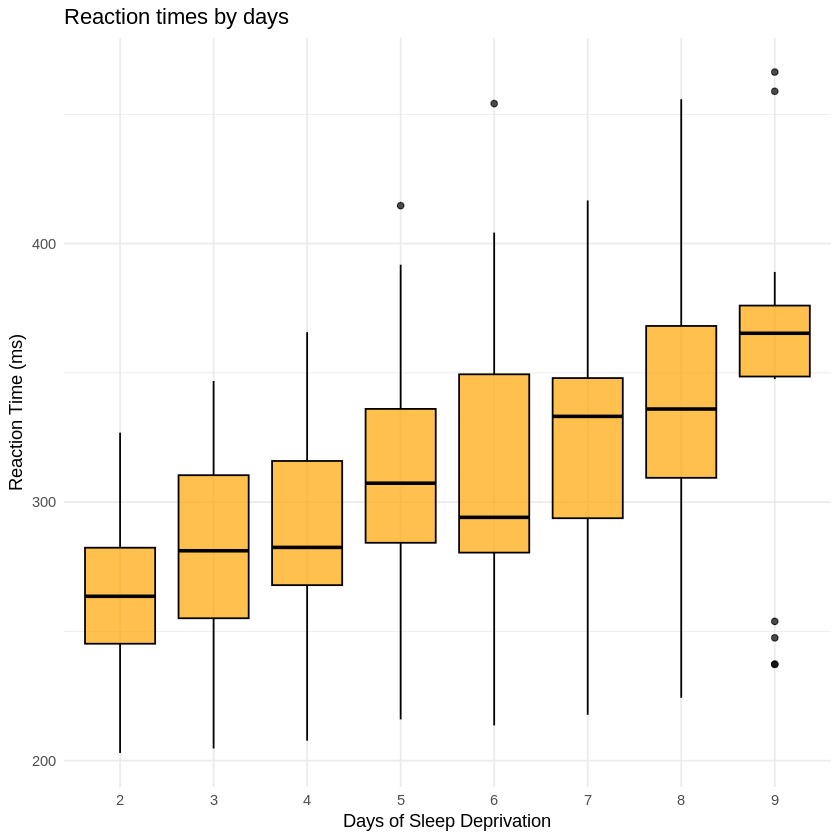

In [9]:
# b) Boxplot by day
ggplot(sleepstudy_days, aes(x = as.factor(Days), y = Reaction)) +
  geom_boxplot(fill = "orange", color = "black", alpha = 0.7) +
  labs(title = "Reaction times by days",
       x = "Days of Sleep Deprivation",
       y = "Reaction Time (ms)") +
  theme_minimal()


**03 - Model**


---


The adequate model for this dataset is a mixed effects model since we are trying to analyze the relationship between reaction times and sleep deprivation according to each participant.

In [10]:
model <- lmer(Reaction ~ Days + (1 + Days | Subject), data = sleepstudy_days)

summary(model)

Linear mixed model fit by REML ['lmerMod']
Formula: Reaction ~ Days + (1 + Days | Subject)
   Data: sleepstudy_days

REML criterion at convergence: 1404.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0157 -0.3541  0.0069  0.4681  5.0732 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 Subject  (Intercept) 992.69   31.507        
          Days         45.77    6.766   -0.25
 Residual             651.59   25.526        
Number of obs: 144, groups:  Subject, 18

Fixed effects:
            Estimate Std. Error t value
(Intercept)  245.097      9.260  26.468
Days          11.435      1.845   6.197

Correlation of Fixed Effects:
     (Intr)
Days -0.454

**04 - Interpretation**

**For fixed effects**
- The average baseline reaction time (on Day 2) for all subjects is approximately 245.1 ms.
- Reaction time increases by 11.4 ms every day in average.

**For random effects**
 - SD of 31.5 ms indicates variance in baseline reaction times among subjects.
 - SD for days (6.77 ms/day) shows that some subjects are more affected by sleep deprivation than others.


> *Some participants are more resilient or sensitive to the effects of sleep deprivation day after another.*



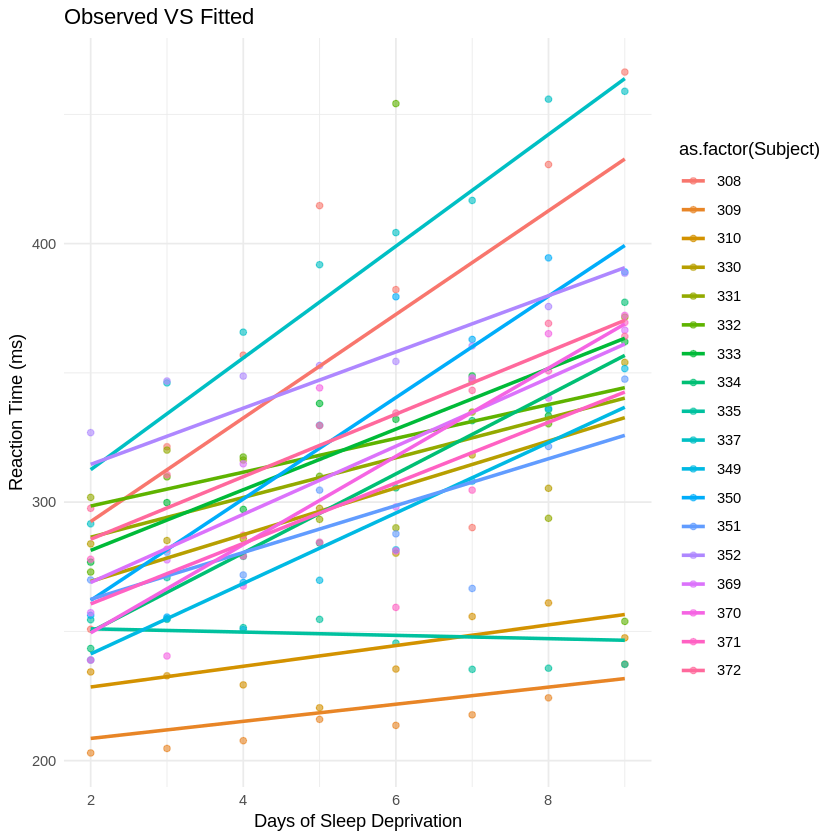

In [11]:
# fitted values
sleepstudy_days$fitted <- fitted(model)

#  observed VS fitted
ggplot(sleepstudy_days, aes(x = Days, y = Reaction, group = Subject)) +
  geom_point(aes(color = as.factor(Subject)), alpha = 0.6) +
  geom_line(aes(y = fitted, color = as.factor(Subject)), linewidth = 1) +
  labs(
    title = "Observed VS Fitted",
    x = "Days of Sleep Deprivation",
    y = "Reaction Time (ms)"
  ) +
  theme_minimal()

**05 - Residuals Analysis**

To check model assumptions, we analyze residuals to ensure normality and homoscedasticity.

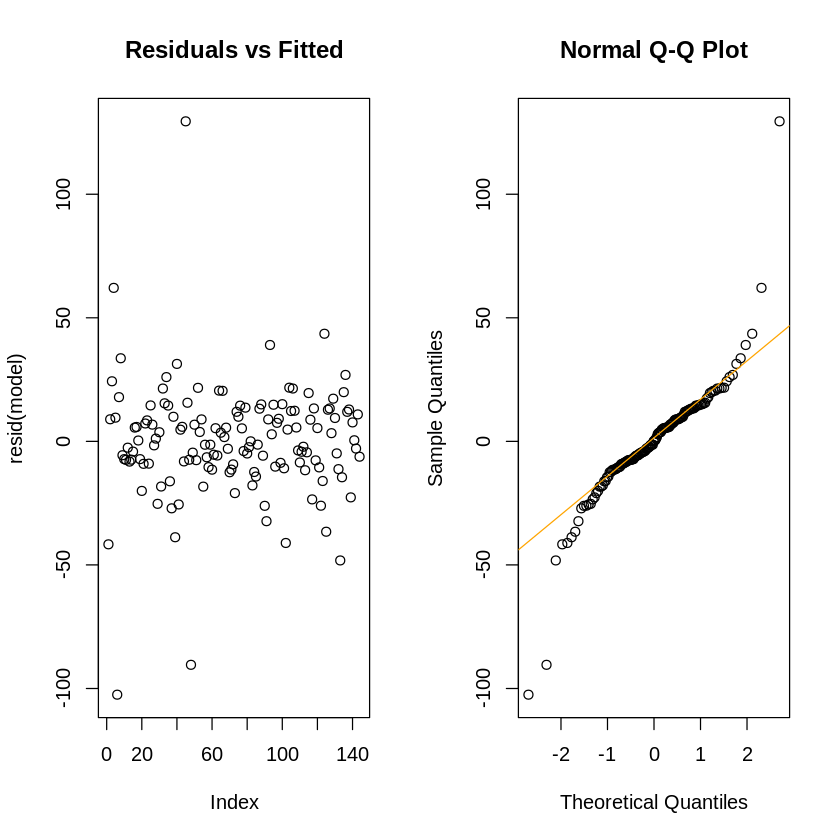

In [12]:
# Residual diagnostics
par(mfrow = c(1, 2))
plot(resid(model), main = "Residuals vs Fitted")
qqnorm(resid(model))
qqline(resid(model), col = "orange")

Note:

The model seems to fit well, with most errors (residuals) behaving as expected. However, a few unusual points (outliers) and small deviations in the Q-Q plot.